### Data warehousing project 2

### Data overview

In [1]:
import numpy as np
import pandas as pd
mp_df = pd.read_csv("mobile_price.csv")
De = pd.read_csv("ColumnDescription.csv")

In [2]:
mp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2000 non-null   int64  
 1   battery_power   2000 non-null   int64  
 2   blue            2000 non-null   object 
 3   clock_speed     2000 non-null   float64
 4   dual_sim        2000 non-null   object 
 5   fc              2000 non-null   int64  
 6   four_g          2000 non-null   int64  
 7   int_memory      2000 non-null   int64  
 8   m_dep           2000 non-null   float64
 9   mobile_wt       2000 non-null   int64  
 10  n_cores         2000 non-null   int64  
 11  pc              2000 non-null   int64  
 12  px_height       2000 non-null   int64  
 13  px_width        2000 non-null   int64  
 14  ram             2000 non-null   int64  
 15  sc_h            2000 non-null   int64  
 16  sc_w            2000 non-null   int64  
 17  talk_time       2000 non-null   i

In [6]:
De.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column        22 non-null     object
 1   Explaination  22 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


### Drop unrelated column

In [7]:
mp_df = mp_df.drop(["id"],axis = 1)

In [8]:
mp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   blue            2000 non-null   object 
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   object 
 4   fc              2000 non-null   int64  
 5   four_g          2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  pc              2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   o

### Change data into unified data 

In [9]:
mp_features = mp_df.drop(["price_category"],axis = 1)

In [10]:
mp_df.describe()

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,price_category
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.503000,0.250000
std,439.418206,0.816004,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.500116,0.433121
min,501.000000,0.500000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000
25%,851.750000,0.700000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.000000,0.000000
50%,1226.000000,1.500000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,0.000000
75%,1615.250000,2.200000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,0.250000
max,1998.000000,3.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000


In [11]:
mp_df["blue"].value_counts()

no     654
yes    623
Yes    173
No     165
NO      96
YES     79
has     62
Has     53
Not     48
not     47
Name: blue, dtype: int64

In [12]:
mp_df['blue'].replace(['yes','Yes','YES','has','Has'], 1, inplace = True)
mp_df['blue'].replace(['no','No','NO','Not','not'], 0, inplace = True)

In [13]:
mp_df["blue"].value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [14]:
mp_df["dual_sim"].value_counts()

yes    645
no     607
No     171
Yes    150
NO     106
YES     99
has     68
Has     57
Not     51
not     46
Name: dual_sim, dtype: int64

In [15]:
mp_df['dual_sim'].replace(['yes','Yes','YES','has','Has'], 1, inplace = True)
mp_df['dual_sim'].replace(['no','No','NO','Not','not'], 0, inplace = True)

In [16]:
mp_df["dual_sim"].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [17]:
mp_df["four_g"].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [18]:
mp_df["three_g"].value_counts()

yes    945
Yes    304
no     301
YES    140
No      86
Has     68
has     66
NO      46
Not     23
not     21
Name: three_g, dtype: int64

In [19]:
mp_df['three_g'].replace(['yes','Yes','YES','has','Has'], 1, inplace = True)
mp_df['three_g'].replace(['no','No','NO','Not','not'], 0, inplace = True)

In [20]:
mp_df["three_g"].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [21]:
mp_df["wifi"].value_counts()

no     645
yes    619
Yes    205
No     181
YES     97
NO      81
Has     55
not     40
Not     39
has     38
Name: wifi, dtype: int64

In [22]:
mp_df['wifi'].replace(['yes','Yes','YES','has','Has'], 1, inplace = True)
mp_df['wifi'].replace(['no','No','NO','Not','not'], 0, inplace = True)

In [23]:
mp_df["wifi"].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

### Save the file named as "modified phone"

In [24]:
mp_df.to_csv("modified phone.csv")

In [25]:
mp_df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_category
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


### Selecting attributes related to phone price

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

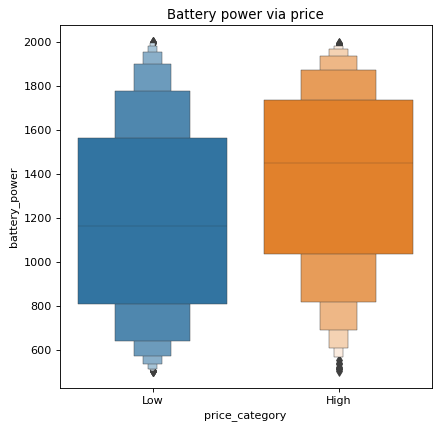

In [44]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'battery_power',data = mp_df,linewidth = 0.4).set_title('Battery power via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Without Blue'), Text(1, 0, 'With Blue')]

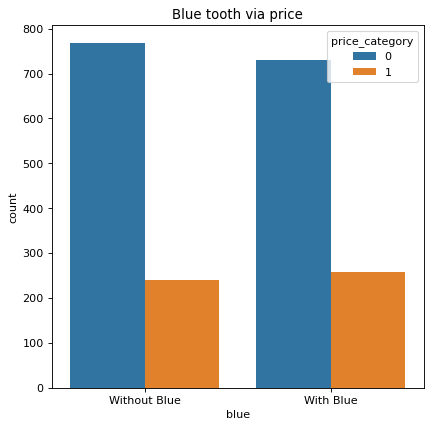

In [46]:
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.countplot(x = 'blue',data = mp_df, hue = 'price_category').set_title('Blue tooth via price')
axe1.set_xticklabels(["Without Blue","With Blue"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

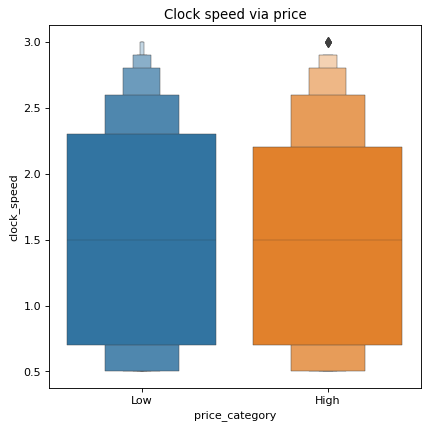

In [48]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'clock_speed',data = mp_df,linewidth = 0.4).set_title('Clock speed via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Without Dual sim'), Text(1, 0, 'With Dual sim')]

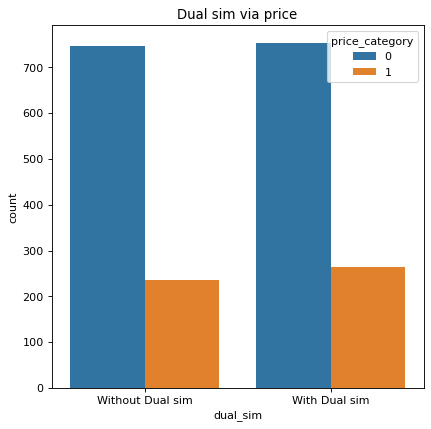

In [50]:
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.countplot(x = 'dual_sim',data = mp_df, hue = 'price_category').set_title('Dual sim via price')
axe1.set_xticklabels(["Without Dual sim","With Dual sim"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

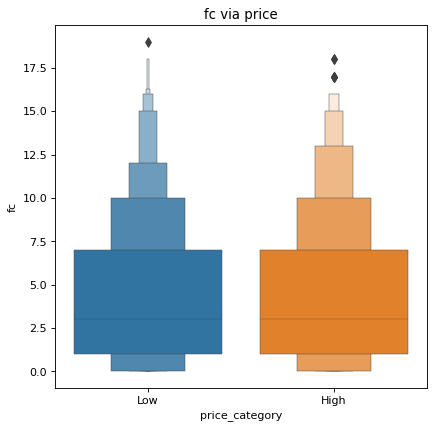

In [52]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'fc',data = mp_df,linewidth = 0.4).set_title('fc via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Without 4g'), Text(1, 0, 'With 4g')]

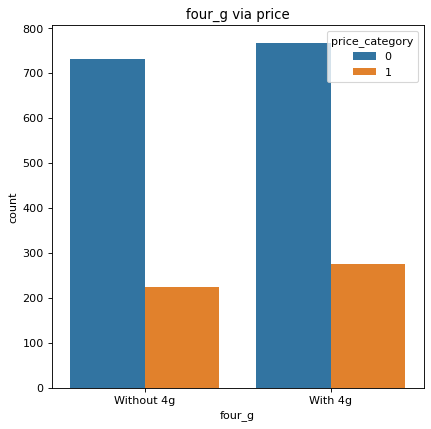

In [51]:
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.countplot(x = 'four_g',data = mp_df, hue = 'price_category').set_title('four_g via price')
axe1.set_xticklabels(["Without 4g","With 4g"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

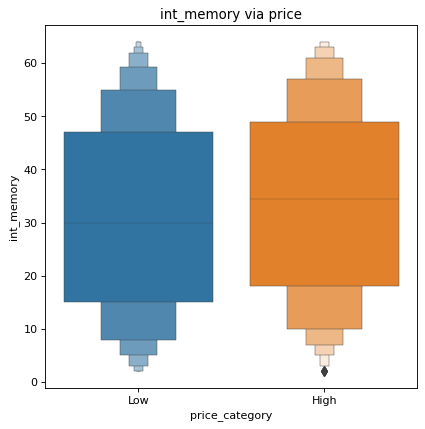

In [53]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'int_memory',data = mp_df,linewidth = 0.4).set_title('int_memory via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

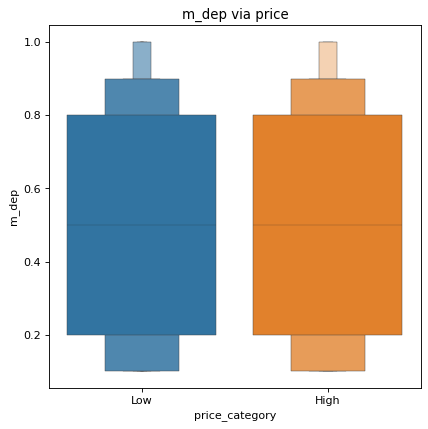

In [54]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'm_dep',data = mp_df,linewidth = 0.4).set_title('m_dep via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

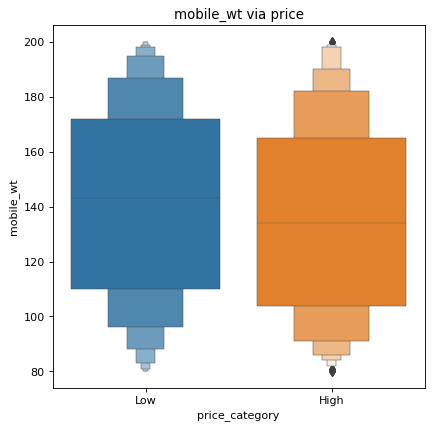

In [55]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'mobile_wt',data = mp_df,linewidth = 0.4).set_title('mobile_wt via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

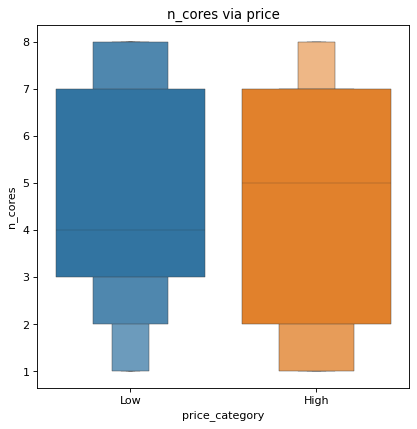

In [56]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'n_cores',data = mp_df,linewidth = 0.4).set_title('n_cores via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

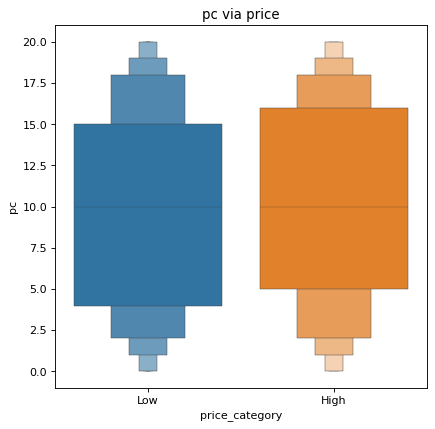

In [57]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'pc',data = mp_df,linewidth = 0.4).set_title('pc via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

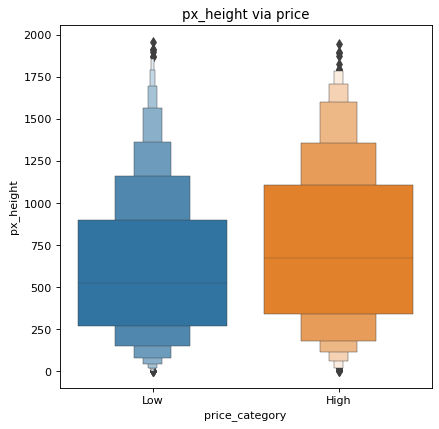

In [59]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'px_height',data = mp_df,linewidth = 0.4).set_title('px_height via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

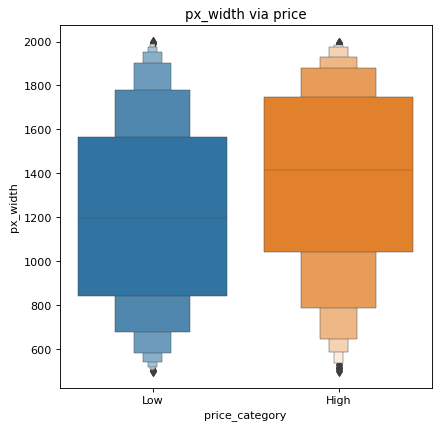

In [61]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'px_width',data = mp_df,linewidth = 0.4).set_title('px_width via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

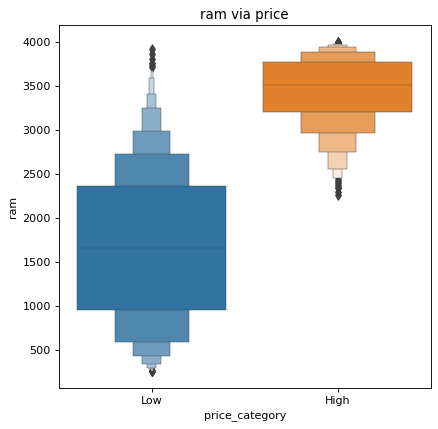

In [63]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'ram',data = mp_df,linewidth = 0.4).set_title('ram via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

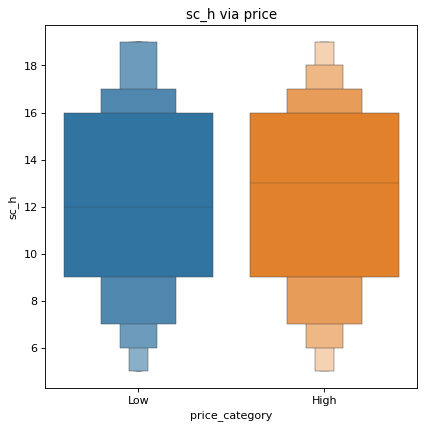

In [64]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'sc_h',data = mp_df,linewidth = 0.4).set_title('sc_h via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

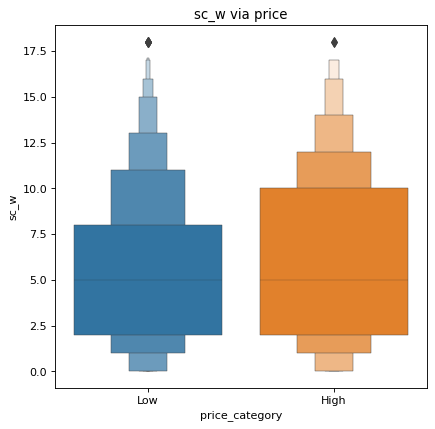

In [65]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'sc_w',data = mp_df,linewidth = 0.4).set_title('sc_w via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

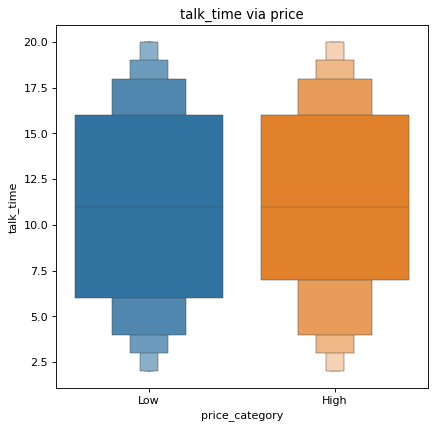

In [66]:
import seaborn as sns
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.boxenplot(x = "price_category",y = 'talk_time',data = mp_df,linewidth = 0.4).set_title('talk_time via price')
axe1.set_xticklabels(["Low","High"])

[Text(0, 0, 'Without 3g'), Text(1, 0, 'With 3g')]

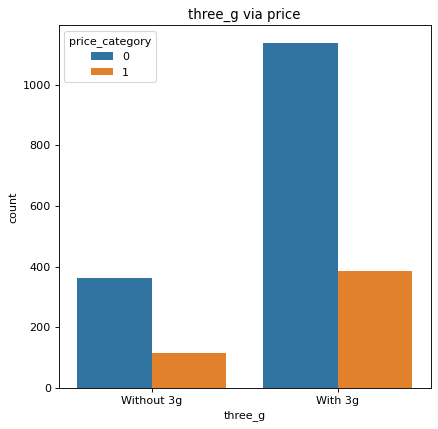

In [67]:
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.countplot(x = 'three_g',data = mp_df, hue = 'price_category').set_title('three_g via price')
axe1.set_xticklabels(["Without 3g","With 3g"])

[Text(0, 0, 'Without touch_screen'), Text(1, 0, 'With touch_screen')]

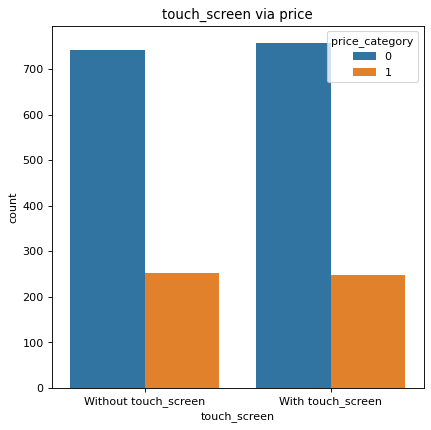

In [68]:
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.countplot(x = 'touch_screen',data = mp_df, hue = 'price_category').set_title('touch_screen via price')
axe1.set_xticklabels(["Without touch_screen","With touch_screen"])

[Text(0, 0, 'Without wifi'), Text(1, 0, 'With wifi')]

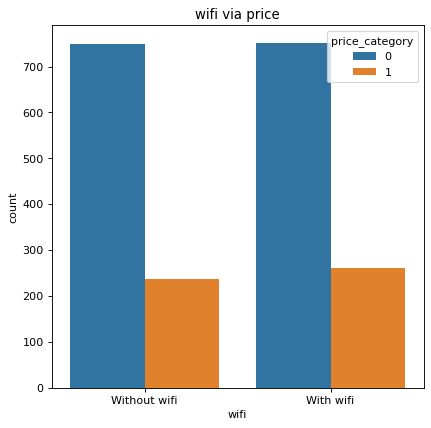

In [69]:
p1 = plt.figure(figsize=(6,6),dpi=80)
axe1 = p1.add_subplot(1,1,1)
sns.countplot(x = 'wifi',data = mp_df, hue = 'price_category').set_title('wifi via price')
axe1.set_xticklabels(["Without wifi","With wifi"])

### Numerosity reduction

In [30]:
from sklearn.model_selection import train_test_split
mp_df80, mp_df20 = train_test_split(mp_df,test_size = 0.2,random_state = 29)

In [32]:
mp_df80.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 85 to 1395
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   1600 non-null   int64  
 1   blue            1600 non-null   int64  
 2   clock_speed     1600 non-null   float64
 3   dual_sim        1600 non-null   int64  
 4   fc              1600 non-null   int64  
 5   four_g          1600 non-null   int64  
 6   int_memory      1600 non-null   int64  
 7   m_dep           1600 non-null   float64
 8   mobile_wt       1600 non-null   int64  
 9   n_cores         1600 non-null   int64  
 10  pc              1600 non-null   int64  
 11  px_height       1600 non-null   int64  
 12  px_width        1600 non-null   int64  
 13  ram             1600 non-null   int64  
 14  sc_h            1600 non-null   int64  
 15  sc_w            1600 non-null   int64  
 16  talk_time       1600 non-null   int64  
 17  three_g         1600 non-null   

In [33]:
mp_df80.to_csv("modified phone 80%.csv")

### Ranking attributes

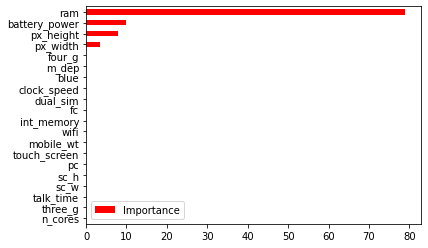

In [24]:
import matplotlib.pyplot as plt
Importance = pd.DataFrame({"Importance": DT.feature_importances_ * 100},
                          index = mp_features.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh", color="r")
plt.show()

In [26]:
Low_importance_features = Importance[Importance["Importance"] < 80 ]
print(Low_importance_features)
print()
print("Retained features importance:", 100 - Low_importance_features["Importance"].sum() )

               Importance
battery_power    9.839461
blue             0.000000
clock_speed      0.000000
dual_sim         0.000000
fc               0.000000
four_g           0.027432
int_memory       0.000000
m_dep            0.000000
mobile_wt        0.000000
n_cores          0.000000
pc               0.000000
px_height        7.813528
px_width         3.437148
ram             78.882431
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
wifi             0.000000

Retained features importance: 0.0
